<div class='alert alert-info alert-block' align='center'><h1><b>Problem Statement</b></h1></div>


Virgin Airlines is an America-based company that offers low-cost passenger flight services. Being in the Airline business for quite a while, it has gone through multiple ups and downs due to fluctuating fuel costs and the COVID impact. In order to regain its market share, the company wants to understand customer reviews better and focus on how people perceive Virgin Airlines’ services on popular social media platforms. As part of this initiative, the company has collected tweets with the @VirginAirlines tag and wants to classify them as positive or negative. 
  
In the provided dataset, please build a Machine Learning model that can correctly predict the sentiment of the tweets. In addition to building the ML model, please build a frequency chart of the most popular words used in the tweets. 
  
#### Data Files : 
- **tweets.csv** file is the main file that contains the tweets and corresponding labels. There are only two columns in the data - label and tweet.
- **test_tweets.csv** contains similar data but the model performance would be evaluated on this dataset and the same can’t be used for modeling purposes.   

#### Approach  
Build a Python-based Machine Learning model that can predict the label for each input tweet(tweets.csv). There should be a corresponding sentiment (positive or negative) for each row in the test set (tweets.csv).  
 
#### Evaluation Metric
The metric used for evaluating the performance of the model is Accuracy. 
Accuracy = Correct Predictions/Total Number of Predictions 
  
The model will be tested on a set of tweets different from the training posts to test the robustness of the model. 

#### Deliverables
Well-commented Jupyter notebook including data processing steps, modeling, and word frequency chart 
Updated sample.csv containing model predicted sentiments   

 
Data Source: https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment?resource=download 
 
Original Source: https://appen.com/pre-labeled-datasets/ 

<div class='alert alert-info alert-block' align='center'><h1><b>Sentiment Analysis</b></h1></div>

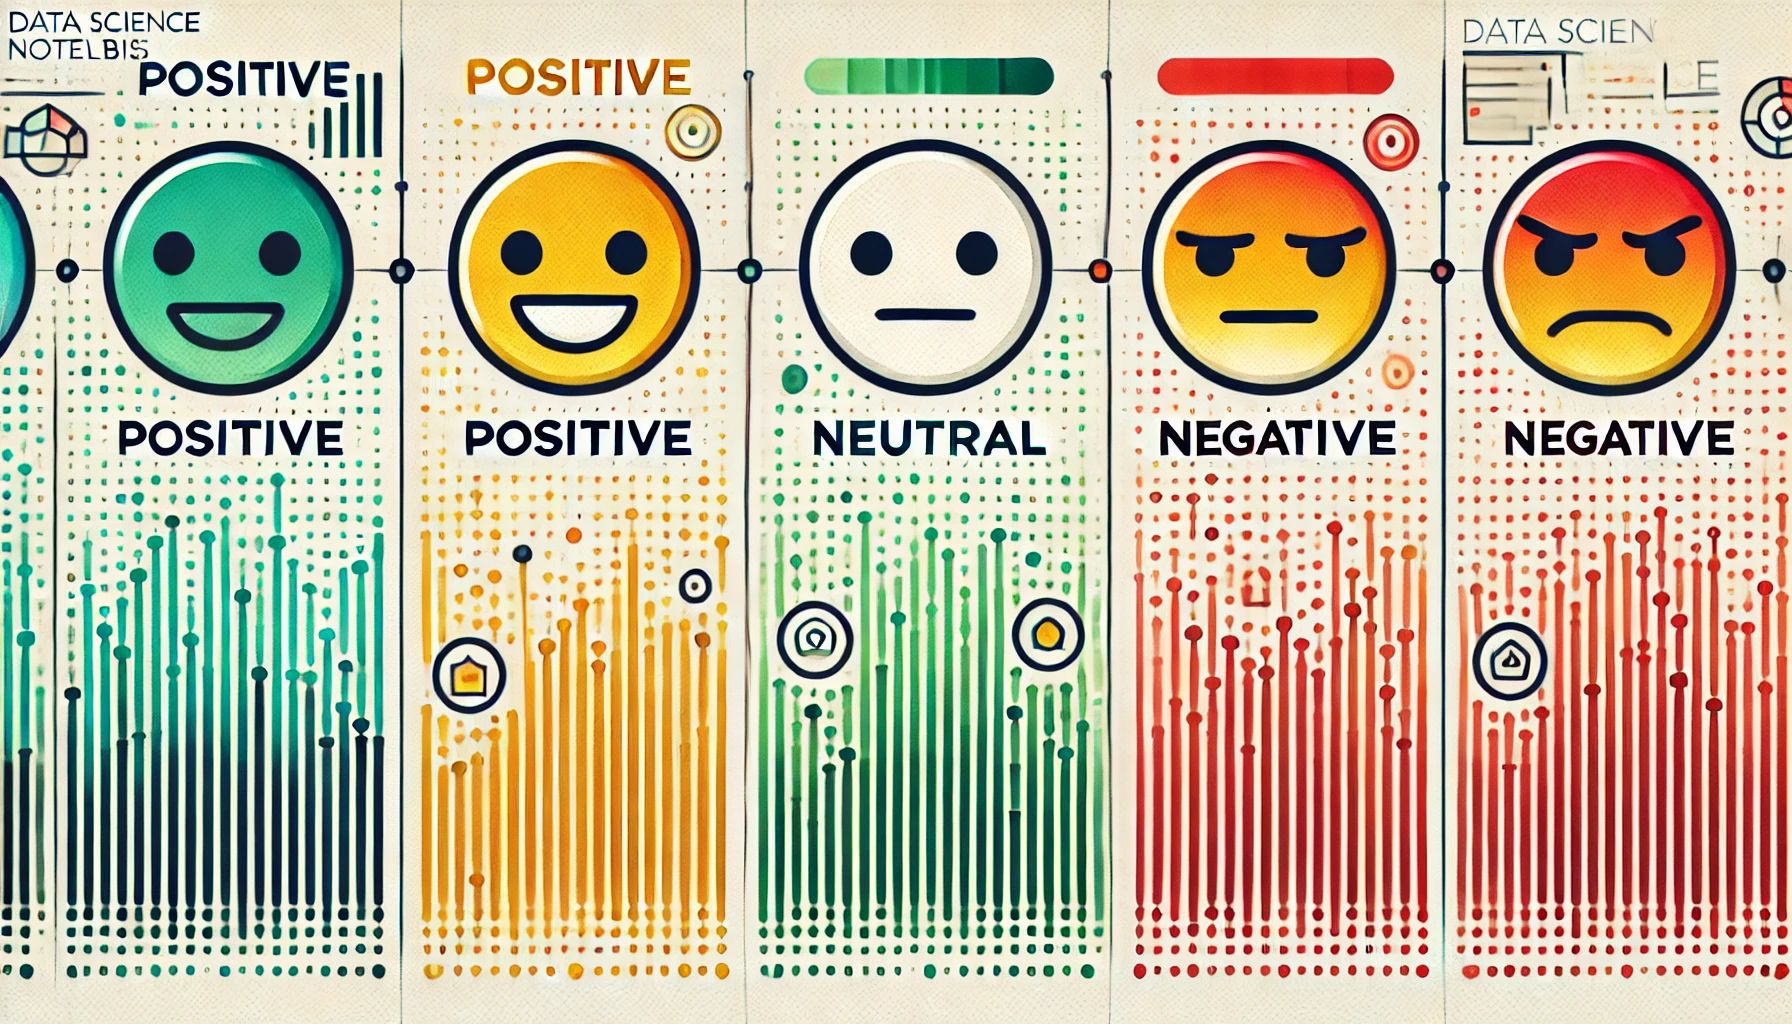

In [147]:
Image(r"sentiment.jpg")

<div class ="alert alert-info alert-block" align='center'><h3>Importing libraries and Understanding the data</h3></div>

In [122]:
# importing library
import pandas as pd
import numpy as np

# visualization library
import matplotlib.pyplot as plt
import seaborn as sns

# scikit learn library for prediction
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay , accuracy_score , classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from collections import Counter

# importing library for puctuation removal
import string
import re

# importing library for nlp task
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer , WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from nltk.util import ngrams

# for image import
from IPython.display import Image

In [3]:
# loading dataset
df = pd.read_csv("Tweets.csv")
df.head()

,label,tweet
0,positive,@VirginAmerica nervous about my flight from DC...
1,positive,@VirginAmerica cool picture of another VirginA...
2,positive,@VirginAmerica Keep up the great work :)
3,positive,@VirginAmerica my goodness your people @love f...
4,positive,@VirginAmerica Thanks for a great flight from ...


In [5]:
# rowsa and columns in dataset
df.shape

(14438, 2)

In [7]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14438 entries, 0 to 14437
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   14438 non-null  object
 1   tweet   14438 non-null  object
dtypes: object(2)
memory usage: 225.7+ KB


<div class="alert alert-info alert-block" align="center"><h3>Exploratory Data Analysis</h3></div>

In [10]:
# count of labels
df['label'].value_counts()

label
negative    9094
positive    5344
Name: count, dtype: int64

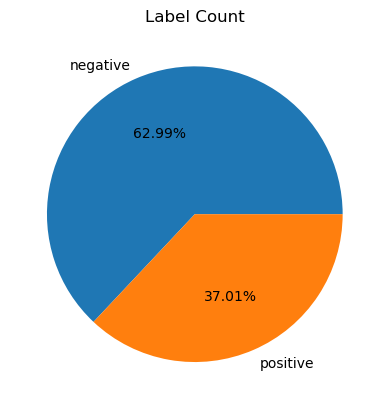

In [12]:
# pie chart of label count
value_count_pct = df['label'].value_counts(normalize=True)

plt.title("Label Count")
plt.pie(value_count_pct.values , labels=value_count_pct.keys(),autopct="%0.2f%%")
plt.show()

In [14]:
# duplicate tweet in data

df['tweet'].duplicated().sum()

212

In [16]:
# dropping duplicted records based on tweet column

df = df.drop_duplicates(subset='tweet' , keep='last')
df.shape

(14226, 2)

In [18]:
# no of words used in tweet
df['word'] = df['tweet'].apply(lambda x : len(x.split(' ')))

In [20]:
df.head()

,label,tweet,word
0,positive,@VirginAmerica nervous about my flight from DC...,21
1,positive,@VirginAmerica cool picture of another VirginA...,14
2,positive,@VirginAmerica Keep up the great work :),7
3,positive,@VirginAmerica my goodness your people @love f...,21
4,positive,@VirginAmerica Thanks for a great flight from ...,27


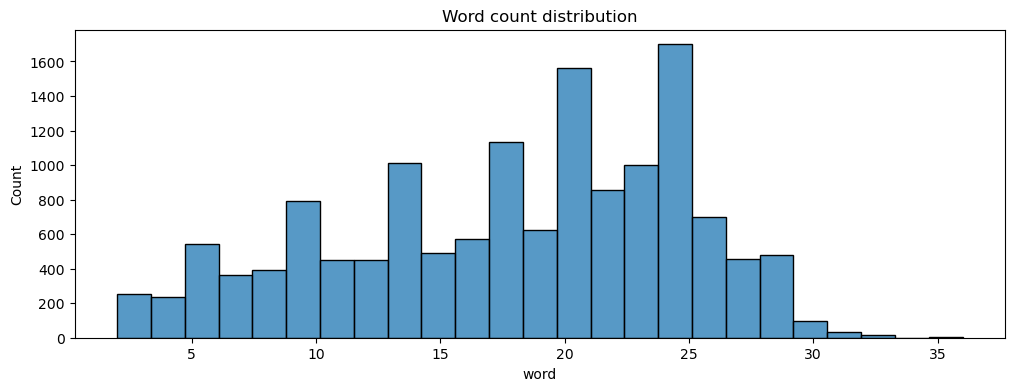

In [22]:
# plotting word distribution

plt.figure(figsize=(12,4))
sns.histplot(df['word'],bins=25)
plt.title('Word count distribution')
plt.show()

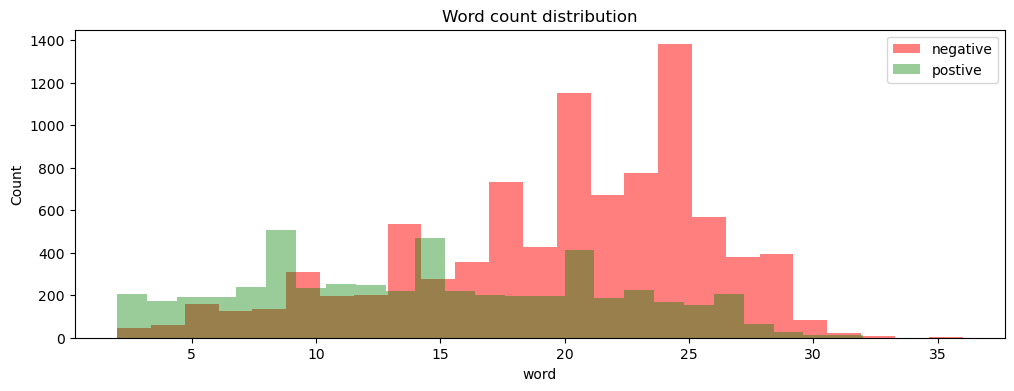

In [24]:
# word count distribution before cleaning of tweet
plt.figure(figsize=(12,4))

sns.histplot(df[df['label']=='negative']['word'],bins=25,alpha=0.5,color='red',label='negative',edgecolor=None)
sns.histplot(df[df['label']=='positive']['word'],bins=25,alpha=0.4,color='green',label='postive',edgecolor=None)

plt.title('Word count distribution')
plt.legend()
plt.show()

In [26]:
# printing the stopwords
print(stopwords.words('english'))
print('')
print('Number of stopwords : ',len(stopwords.words('english')))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [28]:
# creating a funtion text_transf to perform text cleaning
def text_transf(tweet):
    # lowercase the tweet
    tweet = tweet.lower()

    # removing punctuation mention links ..
    # punctuation
    tweet = re.sub('[()!?]',' ',tweet)
    tweet = re.sub('\[.*?\]',' ',tweet)
    # non alphanumeric
    tweet = re.sub('[^a-z0-9]',' ',tweet)
    # @ mentions
    tweet = re.sub('@[A-Za-z0-9_]+','',tweet)
    # hashtags
    tweet = re.sub('#[A-Za-z0-9_]+',' ',tweet)
    # links
    tweet = re.sub(r"htt\S+","",tweet)
    tweet = re.sub(r"www.\S+","",tweet)

    # tokenize the tweet
    tokens = word_tokenize(tweet)

    # Stopword removal and lemmatization
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return ' '.join(cleaned_tokens)

<>:9: SyntaxWarning: invalid escape sequence '\['
<>:9: SyntaxWarning: invalid escape sequence '\['
C:\Users\shubh\AppData\Local\Temp\ipykernel_44256\2409007796.py:9: SyntaxWarning: invalid escape sequence '\['
  tweet = re.sub('\[.*?\]',' ',tweet)


In [30]:
# applying text cleaning funtion on tweet
df['clean_tweet'] = df['tweet'].apply(text_transf)

In [31]:
# top n rows of data
df.head()

,label,tweet,word,clean_tweet
0,positive,@VirginAmerica nervous about my flight from DC...,21,virginamerica nervous flight dc lax getting ca...
1,positive,@VirginAmerica cool picture of another VirginA...,14,virginamerica cool picture another virginameri...
2,positive,@VirginAmerica Keep up the great work :),7,virginamerica keep great work
3,positive,@VirginAmerica my goodness your people @love f...,21,virginamerica goodness people love field amazi...
4,positive,@VirginAmerica Thanks for a great flight from ...,27,virginamerica thanks great flight la boston pi...


In [34]:
# count of word in clean tweet
df['clean_word'] = df['clean_tweet'].apply(lambda x : len(x.split(' ')))
df.head()

,label,tweet,word,clean_tweet,clean_word
0,positive,@VirginAmerica nervous about my flight from DC...,21,virginamerica nervous flight dc lax getting ca...,12
1,positive,@VirginAmerica cool picture of another VirginA...,14,virginamerica cool picture another virginameri...,10
2,positive,@VirginAmerica Keep up the great work :),7,virginamerica keep great work,4
3,positive,@VirginAmerica my goodness your people @love f...,21,virginamerica goodness people love field amazi...,13
4,positive,@VirginAmerica Thanks for a great flight from ...,27,virginamerica thanks great flight la boston pi...,15


In [36]:
# average length of tweet 

print('average word used in positive comment before cleaning : ',round(df[df['label']=='positive']['word'].mean(),0))
print('average word used in negative comment before cleaning : ',round(df[df['label']=='positive']['word'].mean(),0))
print(' ')
print('average word used in positive comment after cleaning : ',round(df[df['label']=='positive']['clean_word'].mean(),0))
print('average word used in negative comment after cleaning : ',round(df[df['label']=='negative']['clean_word'].mean(),0))

average word used in positive comment before cleaning :  14.0
average word used in negative comment before cleaning :  14.0
 
average word used in positive comment after cleaning :  9.0
average word used in negative comment after cleaning :  11.0


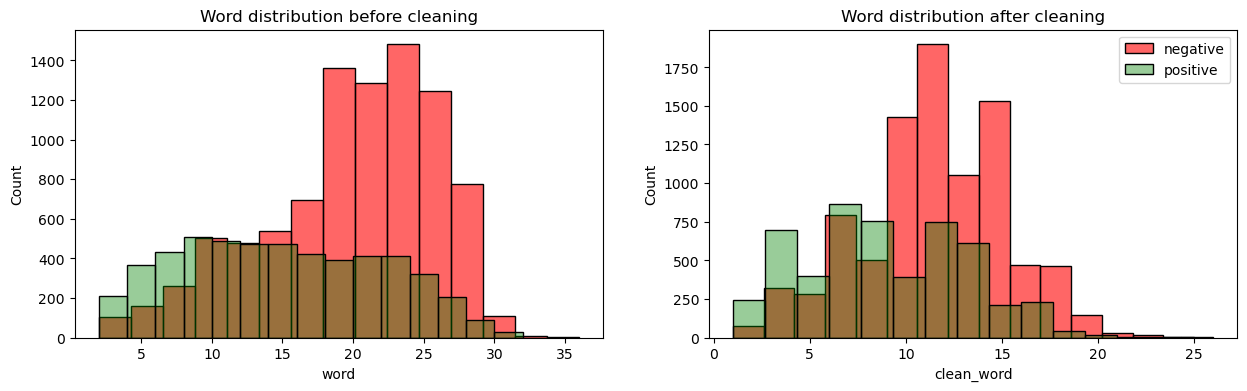

In [38]:
# word count distribution before and after cleaning
plt.figure(figsize=(15,4))

# before cleaning
plt.subplot(1,2,1)
sns.histplot(df[df['label']=='negative']['word'],bins=15,alpha=0.6,color='red',label='negative')
sns.histplot(df[df['label']=='positive']['word'],bins=15,alpha=0.4,color='green',label='positive')
plt.title('Word distribution before cleaning')

# after cleaning
plt.subplot(1,2,2)
sns.histplot(df[df['label']=='negative']['clean_word'],bins=15,alpha=0.6,color='red',label='negative')
sns.histplot(df[df['label']=='positive']['clean_word'],bins=15,alpha=0.4,color='green',label='positive')
plt.title('Word distribution after cleaning')

plt.legend()
plt.show()

### Word Cloud

In [41]:
wc = WordCloud(width=2000,height=1000,min_font_size=15,background_color='black')

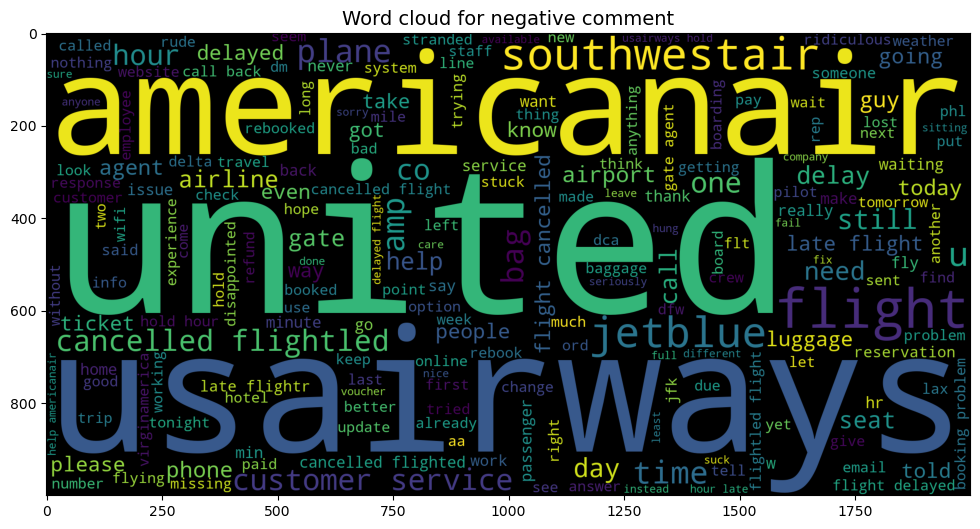

In [43]:
# word cloud for negative comment
plt.figure(figsize=(12,6))
plt.title('Word cloud for negative comment',fontdict={'fontsize':14})
neg_wc = wc.generate(df[df['label']=='negative']['clean_tweet'].str.cat(sep=" "))
plt.imshow(neg_wc)

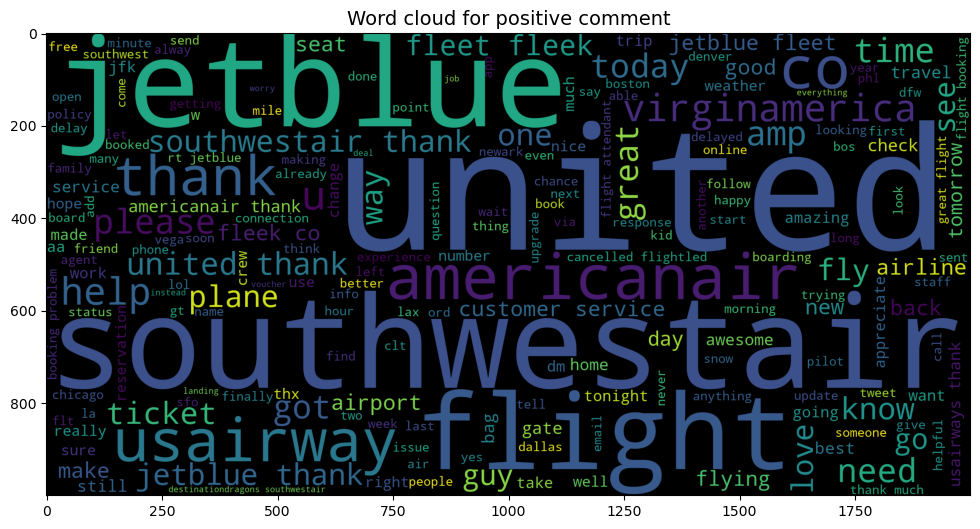

In [44]:
# word cloud for positive comment
plt.figure(figsize=(12,6))
plt.title('Word cloud for positive comment',fontdict={'fontsize':14})
neg_wc = wc.generate(df[df['label']=='positive']['clean_tweet'].str.cat(sep=" "))
plt.imshow(neg_wc)

### Trigrams - most common 3 words used 

In [48]:
# Let's develope tri-gram for ham messages
text_pos = ' '.join(df.loc[df.label == 'negative', 'clean_tweet'].values)
text_trigrams_pos = [i for i in ngrams(text_pos.split(), 3)]

# Let's see for example most common trigrams for ham messages
Counter(text_trigrams_pos).most_common(30)

[(('flight', 'cancelled', 'flightled'), 131),
 (('cancelled', 'flightled', 'flight'), 116),
 (('cancelled', 'flight', 'flight'), 58),
 (('flight', 'booking', 'problem'), 54),
 (('flight', 'cancelled', 'flighted'), 53),
 (('cancelled', 'flighted', 'flight'), 49),
 (('worst', 'customer', 'service'), 42),
 (('reflight', 'booking', 'problem'), 38),
 (('hour', 'late', 'flight'), 35),
 (('hour', 'late', 'flightr'), 35),
 (('hold', '2', 'hour'), 30),
 (('jetblue', 'fleet', 'fleek'), 29),
 (('fleet', 'fleek', 'co'), 29),
 (('cancelled', 'flighting', 'flight'), 24),
 (('poor', 'customer', 'service'), 24),
 (('customer', 'service', 'usairways'), 22),
 (('worst', 'airline', 'ever'), 21),
 (('late', 'flightr', 'still'), 20),
 (('customer', 'service', 'united'), 19),
 (('united', 'customer', 'service'), 19),
 (('terrible', 'customer', 'service'), 19),
 (('1', '5', 'hour'), 19),
 (('2', 'hour', 'hold'), 18),
 (('rt', 'jetblue', 'fleet'), 17),
 (('americanair', 'flight', 'cancelled'), 17),
 (('call',

In [50]:
# Let's develope tri-gram for ham messages
text_pos = ' '.join(df.loc[df.label == 'positive', 'clean_tweet'].values)
text_trigrams_pos = [i for i in ngrams(text_pos.split(), 3)]

# Let's see for example most common trigrams for ham messages
Counter(text_trigrams_pos).most_common(30)

[(('jetblue', 'fleet', 'fleek'), 116),
 (('fleet', 'fleek', 'co'), 115),
 (('rt', 'jetblue', 'fleet'), 36),
 (('flight', 'booking', 'problem'), 33),
 (('united', 'thank', 'united'), 16),
 (('reflight', 'booking', 'problem'), 15),
 (('appease', 'passenger', 'wall'), 15),
 (('passenger', 'wall', 'street'), 15),
 (('jetblue', 'ceo', 'battle'), 15),
 (('battle', 'appease', 'passenger'), 15),
 (('great', 'customer', 'service'), 14),
 (('ceo', 'battle', 'appease'), 14),
 (('keep', 'good', 'work'), 13),
 (('southwestair', 'thank', 'southwestair'), 11),
 (('flight', 'cancelled', 'flightled'), 10),
 (('southwestair', 'love', 'dragon'), 10),
 (('jetblue', 'thank', 'jetblue'), 10),
 (('usairways', 'thank', 'usairways'), 10),
 (('united', 'thanks', 'united'), 9),
 (('jetblue', 'thanks', 'jetblue'), 9),
 (('delay', 'cancelled', 'flightlations'), 8),
 (('cancelled', 'flightled', 'flight'), 8),
 (('wall', 'street', 'waterbury'), 8),
 (('street', 'waterbury', 'republican'), 8),
 (('waterbury', 'republ

## Frequency Count

In [53]:
# intialize the number of frequency count
top_words = 20

# tokenizing the tweet
tokens = [word for tweet in df['clean_tweet'] for word in word_tokenize(tweet)]

# list of rebundant words has no meaning in freq dist
dropwords=['to','i','the','a','you','for','on','and','t','is','in','it','of','me','my','that','can','have','not','s',
          'co','http','are','was','with','at','your','this','we','be','2','get','from','an','do','so','up','m','u']

# removing dropwords from tokens
filter_words = [word for word in tokens if word not in dropwords]

# getting the freq dist of tokens in tweet
word_freq = nltk.FreqDist(filter_words)

# getting top 20 most common words in tweet 
word_freq_df = pd.DataFrame(word_freq.most_common(top_words),columns=['word','frequency'])
word_freq_df

,word,frequency
0,flight,4459
1,united,4146
2,usairways,3038
3,americanair,2798
4,southwestair,2447
5,jetblue,2382
6,hour,1137
7,thanks,1035
8,cancelled,1031
9,service,980


In [54]:
# frequency count for positive comment

# intialize the number of frequency count
top_words = 20

# tokenizing the tweet
tokens = [word for tweet in df[df['label']=='positive']['clean_tweet'] for word in word_tokenize(tweet)]

# list of rebundant words has no meaning in freq dist
dropwords=['to','i','the','a','you','for','on','and','t','is','in','it','of','me','my','that','can','have','not','s',
          'co','http','are','was','with','at','your','this','we','be','2','get','from','an','do','so','up','m','u']

# removing dropwords from tokens
filter_words = [word for word in tokens if word not in dropwords]

# getting the freq dist of tokens in tweet
word_freq = nltk.FreqDist(filter_words)

# getting top 20 most common words in tweet 
word_freq_df = pd.DataFrame(word_freq.most_common(top_words),columns=['word','frequency'])
word_freq_df

,word,frequency
0,jetblue,1332
1,united,1249
2,southwestair,1235
3,flight,1178
4,americanair,779
5,thanks,726
6,usairways,672
7,thank,491
8,help,253
9,great,245


In [55]:
# frequency count for negative comment

# intialize the number of frequency count
top_words = 20

# tokenizing the tweet
tokens = [word for tweet in df[df['label']=='negative']['clean_tweet'] for word in word_tokenize(tweet)]

# list of rebundant words has no meaning in freq dist
dropwords=['to','i','the','a','you','for','on','and','t','is','in','it','of','me','my','that','can','have','not','s',
          'co','http','are','was','with','at','your','this','we','be','2','get','from','an','do','so','up','m','u']

# removing dropwords from tokens
filter_words = [word for word in tokens if word not in dropwords]

# getting the freq dist of tokens in tweet
word_freq = nltk.FreqDist(filter_words)

# getting top 20 most common words in tweet 
word_freq_df = pd.DataFrame(word_freq.most_common(top_words),columns=['word','frequency'])
word_freq_df

,word,frequency
0,flight,3281
1,united,2897
2,usairways,2366
3,americanair,2019
4,southwestair,1212
5,hour,1086
6,jetblue,1050
7,cancelled,900
8,customer,770
9,service,760


<div class='alert alert-info alert-block' align='center'><h3><b>Model Training and Performance Evaluation</b></h3></div>

In [60]:
# splitting data into train and test data
X_train , X_test , y_train , y_test = train_test_split(df['clean_tweet'] , df['label'] , test_size=0.3, random_state=23)

In [62]:
# Number of records in train and test data
print('Train data rows',X_train.shape)
print('Test data rows',X_test.shape)

Train data rows (9958,)
Test data rows (4268,)


In [64]:
# value count for train label
print(y_train.value_counts())

label
negative    6311
positive    3647
Name: count, dtype: int64


In [66]:
# value count for test label
print(y_test.value_counts())

label
negative    2691
positive    1577
Name: count, dtype: int64


<div class='alert alert-info alert-block' align='center'><h4><b>Count Vectorizer Method</b></h4></div>

In [69]:
# transform feature into vector form
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [71]:
# shape of train data afte vectorization
print(X_train_vec.shape)

(9958, 11354)


In [73]:
# shape of test data afte vectorization
print(X_test_vec.shape)

(4268, 11354)


### Logistic Regression

In [76]:

lr=LogisticRegression()

# fitting data
lr.fit(X_train_vec , y_train )
# predicting data
y_pred_lr = lr.predict(X_test_vec)
#check for the performance of the model
print('Accuracy Score : ', accuracy_score(y_pred_lr , y_test))
print(confusion_matrix(y_pred_lr , y_test))
print(classification_report(y_pred_lr , y_test))

Accuracy Score :  0.827788191190253
[[2330  374]
 [ 361 1203]]
              precision    recall  f1-score   support

    negative       0.87      0.86      0.86      2704
    positive       0.76      0.77      0.77      1564

    accuracy                           0.83      4268
   macro avg       0.81      0.82      0.81      4268
weighted avg       0.83      0.83      0.83      4268



### Multinomial Naive Bayes

In [79]:
mnb = MultinomialNB()
# fitting data
mnb.fit(X_train_vec , y_train)
# predicting data
y_pred_mnb = mnb.predict(X_test_vec)
#check for the performance of the model
print('Accuracy Score : ', accuracy_score(y_pred_mnb , y_test))
print(confusion_matrix(y_pred_mnb , y_test))
print(classification_report(y_pred_mnb , y_test))

Accuracy Score :  0.8195876288659794
[[2485  564]
 [ 206 1013]]
              precision    recall  f1-score   support

    negative       0.92      0.82      0.87      3049
    positive       0.64      0.83      0.72      1219

    accuracy                           0.82      4268
   macro avg       0.78      0.82      0.80      4268
weighted avg       0.84      0.82      0.83      4268



### Random Forest Classifier

In [82]:
rf = RandomForestClassifier(n_estimators =100)
# fitting data
rf.fit(X_train_vec , y_train)
# predicting data
y_pred_rf = rf.predict(X_test_vec)
#check for the performance of the model
print('Accuracy Score : ', accuracy_score(y_pred_rf , y_test))
print(confusion_matrix(y_pred_rf , y_test))
print(classification_report(y_pred_rf , y_test))

Accuracy Score :  0.8022492970946579
[[2355  508]
 [ 336 1069]]
              precision    recall  f1-score   support

    negative       0.88      0.82      0.85      2863
    positive       0.68      0.76      0.72      1405

    accuracy                           0.80      4268
   macro avg       0.78      0.79      0.78      4268
weighted avg       0.81      0.80      0.80      4268



### Support Vector Machine

In [85]:
svc = LinearSVC()
# fitting data
svc.fit(X_train_vec,y_train)
# predicting data
y_pred_svc = svc.predict(X_test_vec)
#check for the performance of the model
print('Accuracy Score : ', accuracy_score(y_pred_svc , y_test))
print(confusion_matrix(y_pred_svc , y_test))
print(classification_report(y_pred_svc , y_test))

C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy Score :  0.8095126522961574
[[2248  370]
 [ 443 1207]]
              precision    recall  f1-score   support

    negative       0.84      0.86      0.85      2618
    positive       0.77      0.73      0.75      1650

    accuracy                           0.81      4268
   macro avg       0.80      0.80      0.80      4268
weighted avg       0.81      0.81      0.81      4268



<div class='alert alert-info alert-block' align='center'><h4><b>Term Frequency Inverse Document Frequency (TF-IDF) Method</b></h4></div>

In [88]:
# appying term frequency inverse document frequency on data
vectorizer_tfidf = TfidfVectorizer(use_idf=True)
# transforming data
X_train_tfvec = vectorizer_tfidf.fit_transform(X_train)
X_test_tfvec = vectorizer_tfidf.transform(X_test)

### Logisitic Regression

In [91]:

lr_tf = LogisticRegression()
# fitting data
lr_tf.fit(X_train_tfvec , y_train)
# predicting data
y_pred_lrtf = lr_tf.predict(X_test_tfvec)
#check for the performance of the model
print('Accuracy Score : ', accuracy_score(y_pred_lrtf , y_test))
print(confusion_matrix(y_pred_lrtf , y_test))
print(classification_report(y_pred_lrtf , y_test))

Accuracy Score :  0.8273195876288659
[[2442  488]
 [ 249 1089]]
              precision    recall  f1-score   support

    negative       0.91      0.83      0.87      2930
    positive       0.69      0.81      0.75      1338

    accuracy                           0.83      4268
   macro avg       0.80      0.82      0.81      4268
weighted avg       0.84      0.83      0.83      4268



### Multinomial Naive Bayes

In [94]:

mnb_tf = MultinomialNB()
# fitting data
mnb_tf.fit(X_train_tfvec , y_train)
# predicting data
y_pred_mnbtf = mnb_tf.predict(X_test_tfvec)
#check for the performance of the model
print('Accuracy Score : ', accuracy_score(y_pred_mnbtf , y_test))
print(confusion_matrix(y_pred_mnbtf , y_test))
print(classification_report(y_pred_mnbtf , y_test))

Accuracy Score :  0.7783505154639175
[[2636  891]
 [  55  686]]
              precision    recall  f1-score   support

    negative       0.98      0.75      0.85      3527
    positive       0.44      0.93      0.59       741

    accuracy                           0.78      4268
   macro avg       0.71      0.84      0.72      4268
weighted avg       0.89      0.78      0.80      4268



### Random Forest

In [97]:

rf_tf = LogisticRegression()
# fitting data
rf_tf.fit(X_train_tfvec , y_train)
# predicting data
y_pred_rftf = rf_tf.predict(X_test_tfvec)
#check for the performance of the model
print('Accuracy Score : ', accuracy_score(y_pred_rftf , y_test))
print(confusion_matrix(y_pred_rftf , y_test))
print(classification_report(y_pred_rftf , y_test))

Accuracy Score :  0.8273195876288659
[[2442  488]
 [ 249 1089]]
              precision    recall  f1-score   support

    negative       0.91      0.83      0.87      2930
    positive       0.69      0.81      0.75      1338

    accuracy                           0.83      4268
   macro avg       0.80      0.82      0.81      4268
weighted avg       0.84      0.83      0.83      4268



### Support Vector Machine

In [100]:

svc_tf = LinearSVC()
# fitting data
svc_tf.fit(X_train_tfvec , y_train)
# predicting data
y_pred_svctf = svc_tf.predict(X_test_tfvec)
#check for the performance of the model
print('Accuracy Score : ', accuracy_score(y_pred_svctf , y_test))
print(confusion_matrix(y_pred_svctf , y_test))
print(classification_report(y_pred_svctf , y_test))

C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy Score :  0.8212277413308341
[[2333  405]
 [ 358 1172]]
              precision    recall  f1-score   support

    negative       0.87      0.85      0.86      2738
    positive       0.74      0.77      0.75      1530

    accuracy                           0.82      4268
   macro avg       0.81      0.81      0.81      4268
weighted avg       0.82      0.82      0.82      4268



<div class="alert alert-info alert-block" align='center'><h4><b>Testing Test data</b></h4></div>

In [103]:
# loading test data
test_data = pd.read_csv(r"test_tweets.csv")

# top n rows 
test_data.head()

,label,tweet
0,positive,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,positive,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [105]:
# shape of the test data
test_data.shape

(202, 2)

In [107]:
# applying text cleaning on test data
test_data['clean_tweet'] = test_data['tweet'].apply(text_transf)

In [109]:
# top n rows of data
test_data.head()

,label,tweet,clean_tweet
0,positive,@VirginAmerica What @dhepburn said.,virginamerica dhepburn said
1,positive,@VirginAmerica plus you've added commercials t...,virginamerica plus added commercial experience...
2,positive,@VirginAmerica I didn't today... Must mean I n...,virginamerica today must mean need take anothe...
3,negative,@VirginAmerica it's really aggressive to blast...,virginamerica really aggressive blast obnoxiou...
4,negative,@VirginAmerica and it's a really big bad thing...,virginamerica really big bad thing


In [111]:
# applying tf-idf on test data to convert into vector matrix 
test_vec = vectorizer_tfidf.transform(test_data['clean_tweet'])

In [113]:
# predicting test data
y_pred = lr_tf.predict(test_vec)

In [115]:
#check for the performance of the model on test data 

print('Accuracy Score : ',accuracy_score(y_pred , test_data['label']))
print(confusion_matrix(y_pred,test_data['label']))
print(classification_report(y_pred,test_data['label']))

Accuracy Score :  0.8415841584158416
[[ 63  11]
 [ 21 107]]
              precision    recall  f1-score   support

    negative       0.75      0.85      0.80        74
    positive       0.91      0.84      0.87       128

    accuracy                           0.84       202
   macro avg       0.83      0.84      0.83       202
weighted avg       0.85      0.84      0.84       202



In [117]:
# storing prediction in test data
test_data['predictions'] = y_pred

test_data.head()

,label,tweet,clean_tweet,predictions
0,positive,@VirginAmerica What @dhepburn said.,virginamerica dhepburn said,positive
1,positive,@VirginAmerica plus you've added commercials t...,virginamerica plus added commercial experience...,positive
2,positive,@VirginAmerica I didn't today... Must mean I n...,virginamerica today must mean need take anothe...,negative
3,negative,@VirginAmerica it's really aggressive to blast...,virginamerica really aggressive blast obnoxiou...,negative
4,negative,@VirginAmerica and it's a really big bad thing...,virginamerica really big bad thing,positive


In [126]:
#export the final submission file consisting model prediction on test data 
test_data.to_csv('final_predictions.csv')